# MODELO CLÁSICO

Se desarrolla el modelo clásico de Blecker y Setterfield (2020).

# LIBRERÍAS

Se necesitan las siguientes dos librerías

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# CONTENIDO 

1. [Modelo clásico](##clasico)
2. [Cierre I](##Cierre1)
3. [Cierre II](##Cierre2)
4. [Cierre III](##Cierre3)
5. [Cierre IV](##Cierre3)

## Modelo clásico <a name="#clasico"></a>

De manera simple, se asume que la economía es cerrada y no existe gobierno. El modelo se construye a partir de tres funciones. En orden, la primera es la relación inversa entre la tasa de beneficio y la tasa de salario. Para obtener esta función, se parte de la identidad contable del producto por el método de los ingresos:

\begin{align*}
    pY &\equiv wN + rPK \\
\end{align*}

donde $p$ es el precio por producto, $Y$ es la producción, $w$ es la tasa de salario nominal, $N$ es la cantidad de trabajadores, $r$ es la tasa de beneficio y $K$ es el stock de capital. Al dividir entre $pY$ y reordenando, se obtiene la primera función:

\begin{align}
    r &= \frac{1}{\beta}- \frac{\omega \alpha} {\beta} \\
\end{align}

donde $\omega$ es la tasa de salario real, $\beta$ es el coeficiente capital-producto y $\alpha$ es el coeficiente trabajo-producto. $(1)$ muestra una relación inversa entre la tasa de beneficio y la tasa de salario.

La segunda función es la relación inversa entre la tasa de crecimiento del capital y el consumo per-cápita. Se parte la identidad contable del producto por el método del gasto:

\begin{align*}
    pY &\equiv pC + pI \\
\end{align*}

donde $C$ es consumo y $I$ es la inversión. Al dividir, nuevamente, por $pY$ la identidad y ordenando, se obtiene la segunda función:

\begin{align}
    c &= \frac{1}{α} - \frac{β}{a}g \\
\end{align}

donde $c$ es el consumo per-cápita y $g$ es la tasa de acumulación del capital. $(2)$ muestra una relación inversa entre el consumo per-cápita y la tasa de acumulación del capital (o tasa de crecimiento de la inversión).

Finalmente, la tercera función describe el comportamiento de la tasa de acumulación del capital por parte de los capitalistas. En este modelo, las decisiones de ahorro son las decisiones de inversión. La tasa de acumulación del capital es una fracción de la tasa de beneficio si esta logra superar la tasa de beneficios mínima.

\begin{align}
   g &= s_{r}(r - r_{min})
\end{align}

donde $s_{r}$ es la propensión a ahorrar y $r_{min}$ es la tasa de beneficios mínima que esperan recibir los capitalistas.

In [50]:
"FUNCIONES"

def profit_rate(α, β, w):
    return (1 - w*α)/ β

def consumption(α, β, g):
    return 1/α - (β*g)/α

def investment(sr, rmin, r):
    return sr*(r - rmin)

En el sistema $(1)$, $(2)$ y $(3)$ se tienen tres ecuaciones y cuatro variables endógenas. Por tanto, el modelo es indeterminado: existe un grado de libertad. Entonces, se pueden desarrollar distintos "cierres" para el modelo clásico. Blecker y Setterfield (2019) proponen cuatro "cierres":
    
**Cierre 1**: la tasa de salario real es exógena.
    
**Cierre 2**: la participación de los salarios (o la participación de los beneficios) es exógena.

**Cierre 3**: se agrega una función de comportamiento de la oferta de trabajo.

**Cierre 4**:


## Cierre 1: Tasa de salario real exógena <a name="#Cierre1"></a>

El modelo se desarrolla de manera secuencial: dada la tasa de salario real, se obtiene la tasa de beneficios $(1)$; luego, con la tasa de beneficios, se obtiene la tasa de acumulación de capital $(3)$; finalmente, con la tasa de crecimiento del capital, se obtiene el consumo per-cápita $(2)$. 

Se establecen los siguientes parámetros y la variable exógena tasa de salario real, los cuales deben cumplir las siguientes condiciones: 

\begin{align*}
   r &< \frac{1}{β}
\end{align*}

\begin{align*}
   \omega &< \frac{1}{α}
\end{align*}


In [51]:
"PARÁMETROS"

α_0      = 1.2   # Coeficiente trabajo-producto
β_0      = 1.02  # Coeficiente capital-producto
rmin_0   = 0.12  # Tasa de beneficio mínima
sr_0     = 0.88  # Propensión a ahorrar/invertir
wr_exo   = 0.42  # Tasa de salario real exógeno

Y los dominios y funciones de cada una de las ecuaciones para poder graficarlas:

In [52]:
"DEFINIENDO LAS ECUACIONES"

d_w   = np.arange(0, 1/α_0, 0.001)      # Dominio de función 1
d_g   = np.arange(0, 1/β_0, 0.001)      # Dominio de función 2
d_r   = np.arange(rmin_0, 1/α_0, 0.001) # Dominio de función 3
r     = profit_rate(α_0, β_0, d_w) 
c     = consumption(α_0, β_0, d_g)
g     = investment(sr_0, rmin_0, d_r)

Ahora, se pueden graficar las tres ecuaciones:

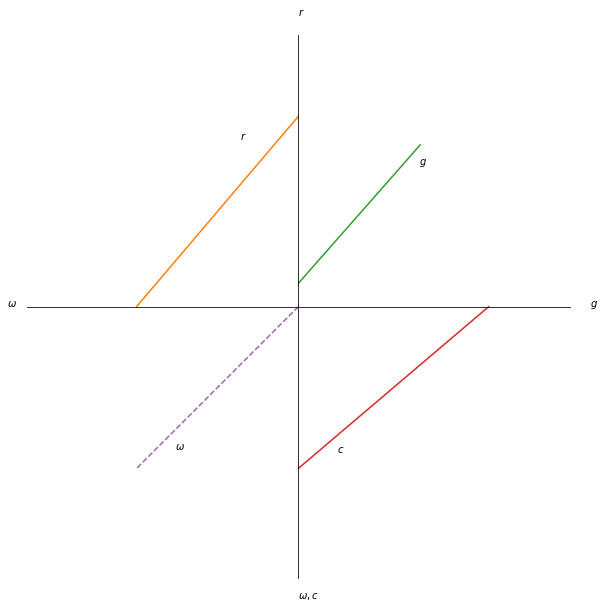

In [53]:
"GRÁFICO DE LAS ECUACIONES"

xmin, xmax, ymin, ymax = -1.4, 1.4, -1.4, 1.4

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(-d_w, r, color = "C01")
ax.plot(g, d_r,  color = "C02")
ax.plot(d_g, -c, color = "C03")
ax.plot(-d_w , -d_w , ls='--', color = "C04")
ax.text(-d_w[300], r[100], "$r$")
ax.text(g[-10], d_r[-100], "$g$")
ax.text(d_g[200], -c[100], "$c$")
ax.text(-d_w[-200], -d_w[-100], "$\omega$")
ax.text(xmin-0.1, 0, "$\omega$")
ax.text(xmax+0.1, 0, "$g$")
ax.text(0, ymax+0.1, "$r$")
ax.text(0, ymin-0.1, "$\omega, c$")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

Observe en el gráfico que en el tercer cuadrante se graficó una ecuación de identidad del salario real, $\omega = \omega$. 

La solución es secuencial:

\begin{align*}
   \omega \Rightarrow r \Rightarrow g \Rightarrow c
\end{align*}


In [54]:
"SOLUCIÓN"

r1_eq  = profit_rate(α_0, β_0, wr_exo)
g1_eq  = investment(sr_0,  rmin_0, r1_eq)
c1_eq  = consumption(α_0, β_0, g1_eq)

Graficando la solución:

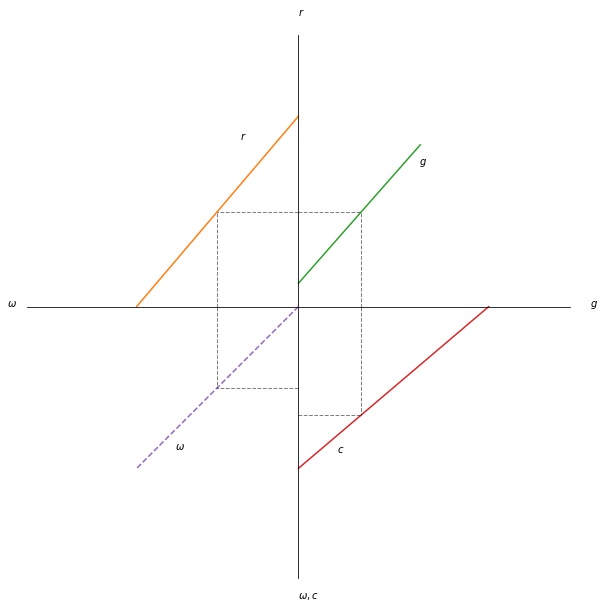

In [55]:
"GRÁFICO DE LA SOLUCIÓN"

xmin, xmax, ymin, ymax = -1.4, 1.4, -1.4, 1.4

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(-d_w, r, color = "C01")
ax.plot(g, d_r, color = "C02")
ax.plot(d_g,-c , color = "C03")
ax.plot(-d_w , -d_w , ls='--', color = "C04")
ax.plot([-wr_exo, -wr_exo], [0, r1_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -wr_exo], [r1_eq , r1_eq ], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g1_eq, g1_eq], [0, r1_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g1_eq], [r1_eq, r1_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g1_eq, g1_eq], [0, -c1_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g1_eq], [-c1_eq, -c1_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([-wr_exo, -wr_exo], [0, -wr_exo], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -wr_exo], [-wr_exo, -wr_exo], c= "black", ls='--', lw=1, alpha=0.5)
ax.text(-d_w[300], r[100], "$r$")
ax.text(g[-10], d_r[-100], "$g$")
ax.text(d_g[200], -c[100], "$c$")
ax.text(-d_w[-200], -d_w[-100], "$\omega$")
ax.text(xmin-0.1, 0, "$\omega$")
ax.text(xmax+0.1, 0, "$g$")
ax.text(0, ymax+0.1, "$r$")
ax.text(0, ymin-0.1, "$\omega, c$")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

Suponiendo que los trabajadores gastan todo sus ingresos, la tasa de salario real es igual al consumo per-cápita de los trabajadores; por tanto, la diferencia entre el consumo per-cápita y el la tasa de salario real es el consumo per-cápita por parte de los capitalistas. Formalmente:

\begin{align*}
   c &= c_{\omega} + c_{r} \\
   \omega &= c_{\omega} \\
   c_{r} &= c - \omega
\end{align*}


donde $c_{\omega}$ es el consumo per-cápita de los trabajadores, $c_{r}$ es el consumo per-cápita de los capitalistas.

In [56]:
c1_eq - wr_exo  # Consumo per-cápita de los capitalistas

0.1393600000000001

## Cierre 2: Participación de los salarios exógena <a name="#Cierre2"></a>

El modelo también se desarrolla de manera secuencial: dado el coeficiente técnico trabajo-producto, con la participación de los salarios se obtiene la tasa de salario real; después, con la tasa de salario real se obtiene la tasa de beneficios $(1)$; luego, con la tasa de beneficios, se obtiene la tasa de acumulación de capital $(3)$; finalmente, con la tasa de crecimiento del capital, se obtiene el consumo per-cápita $(2)$. 

Se establecen los siguientes parámetros y la variable exógena participación de los salarios:

In [57]:
"PARÁMETROS"

α_0      = 1.2   # Coeficiente trabajo-producto
β_0      = 1.02  # Coeficiente capital-producto
rmin_0   = 0.12  # Rentabilidad mínima
sr_0     = 0.88  # Propensión a ahorrar (invertir)
W_0      = 0.38  # Participación de los salarios

De nuevo, los dominios y funciones de cada una de las ecuaciones para poder graficarlas:

In [58]:
"DEFINIENDO LAS ECUACIONES"

d_w    = np.arange(0, 1/α_0, 0.001)      # Dominio de función 1
d_g    = np.arange(0, 1/β_0, 0.001)      # Dominio de función 2
d_r    = np.arange(rmin_0, 1/α_0, 0.001) # Dominio de función 3
r      = profit_rate(α_0, β_0, d_w) 
c      = consumption(α_0, β_0, d_g)
g      = investment(sr_0, rmin_0, d_r)

Se debe obtener la tasa de salario real. La participación de los salarios es igual a los salarios totales divido entre el producto total en términos nominales:

\begin{align*}
   \Omega &= \frac{wL}{pY} = (\frac{w}{p}) (\frac{N}{Y})
\end{align*}

donde $\Omega$ es la participación de los salarios. Como se mostró arriba, $\frac{w}{p}$ es el salario real y $\frac{N}{Y}$ es el coeficiente técnico trabajo-producto, entonces la participación de los salarios se puede expresar también de la siguiente manera:

\begin{align*}
   \Omega &= \omega \alpha
\end{align*}

Al dividir ambos lados por $\alpha$, se tiene que la tasa de salario real es igual a la participación de los salaiores entre el coeficiente técnico trabajo-producto

\begin{align*}
   \omega = \frac{\Omega}{\alpha}
\end{align*}

La solución es también secuencial:

\begin{align*}
   \Omega \Rightarrow  \omega \Rightarrow r \Rightarrow g \Rightarrow c
\end{align*}


In [59]:
"SOLUCIÓN"

wr_par  = (W_0/α_0)                      # Tasa de salario real 
r2_eq   = profit_rate(α_0, β_0, wr_par)   
g2_eq   = investment(sr_0, rmin_0, r2_eq) 
c2_eq   = consumption(α_0, β_0, g2_eq)   

Graficando la solución:

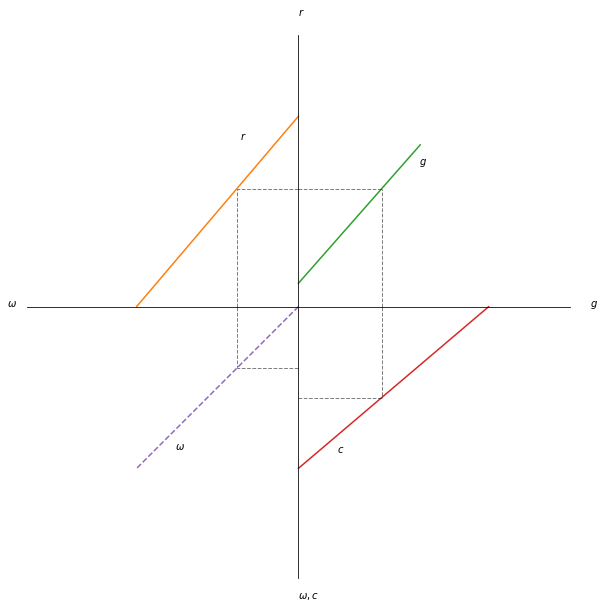

In [60]:
"REPRESENTACIÓN GRÁFICA"

xmin, xmax, ymin, ymax = -1.4, 1.4, -1.4, 1.4

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(-d_w, r, color = "C01")
ax.plot(g, d_r,  color = "C02")
ax.plot(d_g, -c, color = "C03")
ax.plot(-d_w , -d_w , ls='--', color = "C04")
ax.plot([-wr_par, -wr_par], [0, r2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -wr_par], [r2_eq , r2_eq ], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g2_eq, g2_eq], [0, r2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g2_eq], [r2_eq, r2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g2_eq, g2_eq], [0, -c2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g2_eq], [-c2_eq, -c2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([-wr_par, -wr_par], [0, -wr_par], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -wr_par], [-wr_par, -wr_par], c= "black", ls='--', lw=1, alpha=0.5)
ax.text(-d_w[300], r[100], "$r$")
ax.text(g[-10], d_r[-100], "$g$")
ax.text(d_g[200], -c[100], "$c$")
ax.text(-d_w[-200], -d_w[-100], "$\omega$")
ax.text(xmin-0.1, 0, "$\omega$")
ax.text(xmax+0.1, 0, "$g$")
ax.text(0, ymax+0.1, "$r$")
ax.text(0, ymin-0.1, "$\omega, c$")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

## Cierre 3: Con una ecuación de la tasa de crecimiento de la oferta de trabajo <a name="#Cierre3"></a>

Al resolver conjuntamente la ecuación de la tasa de acumulación del capital y la ecuación de la oferta de trabajo, se obtienen la tasa de beneficios y la tasa de acumulación de capital. Con estas dos variables, se obtienen, de manera secuencial, la tasa de salario real $(1)$ y la tasa de consumo per-cápita $(2)$.

### Ecuación de oferta de trabajo

In [61]:
# Función de oferta de trabajo 

def labor_supply(n0, n1, α, β, r): 
    return n0 + n1*(1 - β*r)/α

Tenga en cuenta que la ecuación de la oferta de trabajo solo puede cerrar el modelo porque se encuentra relacionada con las variables endógenas establecidas, específicamente con la tasa de beneficios; de esa manera, el modelo se resuelve con cuatro ecuaciones y cuatro variables endógenas.

Se establecen los siguientes parámetros:

In [62]:
"PARÁMETROS"

α_0      = 1.2   # Coeficiente trabajo-producto
β_0      = 1.02  # Coeficiente capital-producto
rmin_0   = 0.12  # Rentabilidad mínima
sr_0     = 0.88  # Propensión a ahorrar (invertir)
n0_0     = 0.2 # Término autónomo  
n1_0     = 0.7 # Sensibilidad de la oferta de trabajo a cambios en el salario real

Una vez más, los dominios de las ecuaciones para la representación gráfica (note que se incorpora la ecuación $n$):

In [63]:
"DEFINIENDO FUNCIONES"

d_w    = np.arange(0, 1/α_0, 0.001)      # Dominio de la Ecuación 1
d_r    = np.arange(rmin_0, 1/α_0, 0.001) # Dominio de la Ecuación 2
d_g    = np.arange(0, 1/β_0, 0.001)      # Dominio de la Ecuación 3
r      = profit_rate(α_0, β_0, d_w) 
g      = investment(sr_0, rmin_0, d_r)
n      = labor_supply(n0_0, n1_0, α_0, β_0, d_r)
c      = consumption(α_0, β_0, d_g)

Primero, se resuelve simultáneamente la ecuación $g$ y la ecuación $n$, a partir de la condición de equilibrio $n = g $. Una manera sencilla computacionalente es emplear matrices. Las variables endógenas de este pequeño sistema de ecuaciones es la tasa de beneficios y la tasa de acumulación de capital. Entonces, se tiene que definir las matrices $A$ y $B$. De $(1)$ y $(2)$:

\begin{align*}
   g &= s_{r}(r - r_{min}) \\\\
   n &= n_{0} + \frac{n_{1}(1 - βr)}{α} \\
\end{align*}

Ordenando:

\begin{align*}
   g - s_{r}r  &= - s_{r}r_{min} \\\\
   n + \frac{n_{1}β}{α}r &= n_{0} + \frac{n_{1}}{α} \\
\end{align*}

Matricialmente, dada la condición de equilibrio $n = g $:

\begin{align*}
AX = B
\end{align*}

donde
$A=
\begin{pmatrix}
1 & -s_{r}\\
1 & \frac{n_{1}β}{α} \\
\end{pmatrix}$, $B=
\begin{pmatrix}
-s_{r}r_{min}\\
n_{0} + \frac{n_{1}}{α} \\
\end{pmatrix}$, $X=
\begin{pmatrix}
g \\
r \\
\end{pmatrix}$

Si la matriz $A$ tiene inversa, $A^{-1}$, entonces al premultiplicar a ambos lados por $A^{-1}$ se tiene que la solución de este sistema es de la forma:

\begin{align*}
X = A^{-1}B
\end{align*}

In [64]:
"SOLUCIÓN "

# Matrices A y B

A = np.array([[1, -sr_0],
                 [1,n1_0*β_0/α_0]])

B = np.array([-sr_0*rmin_0,+n0_0 + n1_0/α_0])

# Obteniendo la matriz inversa de A

A_inv = np.linalg.inv(A)

# Resolviendo

n3_eq, r3_eq = np.dot(A_inv, B) 

Segundo, con los valores de $g$ y de $r$ se obtienen las otras dos variables endógenas; no obstante, note que para hallar la tasa de salario real no se puede emplear $(1)$; más bien, se tiene que emplear la función inversa de $(1)$. Es decir,

$ r (w)^{-1} = w (r) = \frac{(1 - rβ)}{α}  $     (Ecuación 1')

De esta manera, al resolver la Ecuación 1' se obtiene la tasa de salario real y al resolver la Ecuación 3 se obtiene el consumo per-cápita. 

In [65]:
"SOLUCIÓN (continúa)"

# Función inversa de la Ecuación 1

def invprofit_rate(α, β, r):
    return (1 -r*β)/α

r3_eq              
g3_eq    = n3_eq  # Equilibrio n = g 
w3_eq    = invprofit_rate(α_0, β_0, r3_eq)
c3_eq    = consumption(α_0, β_0, g3_eq)

Graficando la solución:

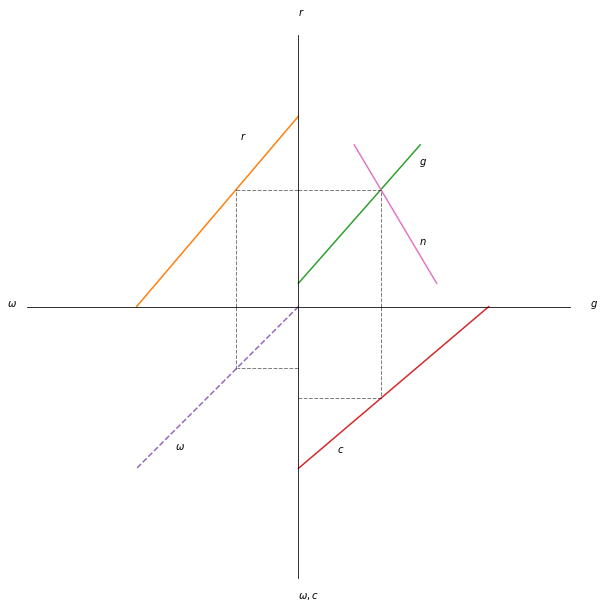

In [66]:
"REPRESENTACIÓN GRÁFICA"

xmin, xmax, ymin, ymax = -1.4, 1.4, -1.4, 1.4

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(-d_w, r, color = "C01")
ax.plot(g, d_r, color = "C02")
ax.plot(n, d_r, color = "C06")
ax.plot(d_g,-c , color = "C03")
ax.plot(-d_w , -d_w , ls='--', color = "C04")
ax.plot([-w3_eq, -w3_eq], [0, r2_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -w3_eq], [r3_eq , r3_eq ], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g3_eq, g3_eq], [0, r3_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g3_eq], [r3_eq, r3_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([g3_eq, g3_eq], [0, -c3_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, g3_eq], [-c3_eq, -c3_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([-w3_eq, -w3_eq], [0, -w3_eq], c= "black", ls='--', lw=1, alpha=0.5)
ax.plot([0, -wr_par], [-wr_par, -wr_par], c= "black", ls='--', lw=1, alpha=0.5)
ax.text(-d_w[300], r[100], "$r$")
ax.text(g[-10],d_r[-100], "$g$")
ax.text(n[150], d_r[200], "$n$")
ax.text(d_g[200], -c[100], "$c$")
ax.text(-d_w[-200], -d_w[-100], "$\omega$")
ax.text(xmin-0.1, 0, "$\omega$")
ax.text(xmax+0.1, 0, "$g$")
ax.text(0, ymax+0.1, "$r$")
ax.text(0, ymin-0.1, "$\omega, c$")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

# Referencias

Blecker, R. A., & Setterfield, M. (2019). Heterodox macroeconomics: Models of demand, distribution and growth. Edward Elgar Publishing.